In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Airbnb training dataset
df = pd.read_csv('/kaggle/input/airbnb-property-rental-price/train.csv')


In [3]:
# Display data type of each column
for col in df.columns:
    print(f"{col}: {df[col].dtype}")

id: int64
name: object
description: object
neighborhood_overview: object
host_id: int64
host_name: object
host_since: object
host_location: object
host_about: object
host_response_time: object
host_response_rate: object
host_acceptance_rate: object
host_is_superhost: object
host_neighbourhood: object
host_listings_count: float64
host_total_listings_count: float64
host_verifications: object
host_has_profile_pic: object
host_identity_verified: object
neighbourhood: object
neighbourhood_cleansed: object
latitude: float64
longitude: float64
property_type: object
room_type: object
accommodates: int64
bathrooms: float64
bathrooms_text: object
bedrooms: float64
beds: float64
amenities: object
price: float64
has_availability: object
availability_30: int64
availability_60: int64
availability_90: int64
availability_365: int64
number_of_reviews: int64
number_of_reviews_ltm: int64
number_of_reviews_l30d: int64
availability_eoy: float64
number_of_reviews_ly: float64
estimated_occupancy_l365d: float

In [4]:
df.shape      

(261894, 55)

In [5]:
df.head()   

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,id,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,host_response_time,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,city
0,1234376912864523021,Spacious Garden Apt in Center Square,Nestled in the vibrant heart of the historic C...,NaN,564967431,Stephanie,2024-03-02,NaN,NaN,within an hour,...,2024-10-28,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.44,Albany
1,887167811237271928,The Comfort II,Your family will be close to everything when y...,NaN,459472925,Gabriel,2022-05-16,"Albany, NY",NaN,within a few hours,...,2025-02-17,4.73,4.69,4.69,4.92,5.00,4.12,4.65,1.23,Albany
2,938271786418327576,Knickerbocker 3 The Argus Hotel,Large queen room with queen pull out couch loc...,The Argus Hotel is located directly on Washing...,526358730,Argus,2023-07-17,NaN,NaN,within an hour,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albany
3,898743867240851780,"Airy 5Br-2Ba,Kids Rm, 6TVs,Pvt Fence-yard&Park...","Whatever brings you to Albany, New York – wish...",NaN,516414095,Rashawn,2023-05-24,"Albany, NY",NaN,within an hour,...,2025-01-26,4.88,4.88,4.86,4.94,4.98,4.80,4.92,2.36,Albany
4,1005978346817864540,Massive 4BD/3BA 2-Fl Townhouse Apt Downtown Al...,Stay in our 4-bedroom townhouse-style 2-story ...,+ 92 Walkscore<br />+ 5-minute walk to MVP Are...,44434571,Earl,2015-09-17,NaN,"I grew up in Cebu, Philippines and moved to Ne...",within an hour,...,2025-01-26,4.80,4.86,4.84,4.86,4.90,4.61,4.76,2.99,Albany


In [6]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261894 entries, 0 to 261893
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           261894 non-null  int64  
 1   name                         261894 non-null  object 
 2   description                  255801 non-null  object 
 3   neighborhood_overview        127687 non-null  object 
 4   host_id                      261894 non-null  int64  
 5   host_name                    261780 non-null  object 
 6   host_since                   261771 non-null  object 
 7   host_location                195064 non-null  object 
 8   host_about                   135708 non-null  object 
 9   host_response_time           221647 non-null  object 
 10  host_response_rate           221647 non-null  object 
 11  host_acceptance_rate         239348 non-null  object 
 12  host_is_superhost            254521 non-null  object 
 13 

In [7]:
# Check for null values and sort by most missing
null_values = df.isnull().sum().reset_index()
null_values.columns = ['Column', 'Missing Values']
null_values = null_values[null_values['Missing Values'] > 0]  # only show columns with missing values
null_values = null_values.sort_values(by='Missing Values', ascending=False)

null_values


,Column,Missing Values
13,host_neighbourhood,158979
40,availability_eoy,139665
42,estimated_occupancy_l365d,139665
43,estimated_revenue_l365d,139665
41,number_of_reviews_ly,139665
3,neighborhood_overview,134207
19,neighbourhood,134206
8,host_about,126186
7,host_location,66830
49,review_scores_checkin,50967


In [8]:
# Drop columns that are IDs, text-heavy, or cause leakage for demand prediction
drop_cols = [
    # Identifiers
    'id', 'host_id',
    
    # High-cardinality / free text
    'name', 'description', 'neighborhood_overview', 'host_name',
    'host_about', 'host_location', 'host_neighbourhood','neighbourhood',
    
   
    # Leakage from target (revenue is highly correlated with occupancy)
    'estimated_revenue_l365d'
]

df= df.drop(columns=drop_cols, errors='ignore')

print("Shape after drop:", df.shape)
pd.set_option('display.max_columns', None)
df.head()


Shape after drop: (261894, 44)


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,city
0,2024-03-02,within an hour,100%,88%,f,2.0,2.0,"['email', 'phone']",t,t,SIXTH WARD,42.650468,-73.764348,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Central heating"", ""Cleaning products"", ""Bed ...",82.0,t,0,0,16,286,2,2,0,227.0,2.0,12.0,2024-10-19,2024-10-28,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.44,Albany
1,2022-05-16,within a few hours,90%,57%,f,2.0,2.0,['phone'],t,t,THIRD WARD,42.662460,-73.765760,Private room in rental unit,Private room,1,1.0,1 shared bath,1.0,2.0,"[""Microwave"", ""Free parking on premises"", ""Tra...",36.0,t,30,59,89,363,26,10,1,304.0,12.0,60.0,2023-06-06,2025-02-17,4.73,4.69,4.69,4.92,5.00,4.12,4.65,1.23,Albany
2,2023-07-17,within an hour,80%,98%,f,12.0,13.0,"['email', 'phone']",t,f,SIXTH WARD,42.658680,-73.773330,Room in hotel,Private room,2,1.0,1 bath,1.0,1.0,"[""Microwave"", ""Free parking on premises"", ""Fir...",243.0,t,26,52,81,340,0,0,0,281.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albany
3,2023-05-24,within an hour,100%,97%,t,1.0,2.0,"['email', 'phone']",t,t,TENTH WARD,42.660870,-73.786550,Entire home,Entire home/apt,11,2.0,2 baths,5.0,6.0,"[""Microwave"", ""Dishwasher"", ""Central heating"",...",237.0,t,20,47,74,74,49,19,0,74.0,20.0,114.0,2023-06-19,2025-01-26,4.88,4.88,4.86,4.94,4.98,4.80,4.92,2.36,Albany
4,2015-09-17,within an hour,100%,99%,f,10.0,10.0,"['email', 'phone']",t,t,SECOND WARD,42.645349,-73.753647,Entire rental unit,Entire home/apt,12,3.0,3 baths,4.0,4.0,"[""Microwave"", ""Dishwasher"", ""Pack \u2019n play...",193.0,t,19,45,72,336,49,38,0,277.0,39.0,228.0,2023-10-29,2025-01-26,4.80,4.86,4.84,4.86,4.90,4.61,4.76,2.99,Albany


In [9]:
df.isnull().sum()

host_since                        123
host_response_time              40247
host_response_rate              40247
host_acceptance_rate            22546
host_is_superhost                7373
host_listings_count               123
host_total_listings_count         123
host_verifications                123
host_has_profile_pic              123
host_identity_verified            123
neighbourhood_cleansed           8693
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                         125
bathrooms_text                    234
bedrooms                          352
beds                              490
amenities                           0
price                               0
has_availability                 2286
availability_30                     0
availability_60                     0
availability_90                     0
availability

#### In the data we see that the huge missing data for estimated_occupancy_l365d  is a city phenomenon, i.e. that either the values are present for the whole city, or none at all.

Target varibale is estimated_occupancy_l365d for demand, so will need to drop all containing null

In [10]:
# Drop rows with no target value
df = df.dropna(subset=['estimated_occupancy_l365d']).copy()

print("Shape after drop:", df.shape)

# Check missing counts again
df.isnull().sum()


Shape after drop: (122229, 44)


host_since                       105
host_response_time             12887
host_response_rate             12887
host_acceptance_rate            8723
host_is_superhost               4021
host_listings_count              105
host_total_listings_count        105
host_verifications               105
host_has_profile_pic             105
host_identity_verified           105
neighbourhood_cleansed           234
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                         49
bathrooms_text                    87
bedrooms                         179
beds                             240
amenities                          0
price                              0
has_availability                 903
availability_30                    0
availability_60                    0
availability_90                    0
availability_365                   0
n

In [11]:
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,city
0,2024-03-02,within an hour,100%,88%,f,2.0,2.0,"['email', 'phone']",t,t,SIXTH WARD,42.650468,-73.764348,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Central heating"", ""Cleaning products"", ""Bed ...",82.0,t,0,0,16,286,2,2,0,227.0,2.0,12.0,2024-10-19,2024-10-28,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.44,Albany
1,2022-05-16,within a few hours,90%,57%,f,2.0,2.0,['phone'],t,t,THIRD WARD,42.662460,-73.765760,Private room in rental unit,Private room,1,1.0,1 shared bath,1.0,2.0,"[""Microwave"", ""Free parking on premises"", ""Tra...",36.0,t,30,59,89,363,26,10,1,304.0,12.0,60.0,2023-06-06,2025-02-17,4.73,4.69,4.69,4.92,5.00,4.12,4.65,1.23,Albany
2,2023-07-17,within an hour,80%,98%,f,12.0,13.0,"['email', 'phone']",t,f,SIXTH WARD,42.658680,-73.773330,Room in hotel,Private room,2,1.0,1 bath,1.0,1.0,"[""Microwave"", ""Free parking on premises"", ""Fir...",243.0,t,26,52,81,340,0,0,0,281.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albany
3,2023-05-24,within an hour,100%,97%,t,1.0,2.0,"['email', 'phone']",t,t,TENTH WARD,42.660870,-73.786550,Entire home,Entire home/apt,11,2.0,2 baths,5.0,6.0,"[""Microwave"", ""Dishwasher"", ""Central heating"",...",237.0,t,20,47,74,74,49,19,0,74.0,20.0,114.0,2023-06-19,2025-01-26,4.88,4.88,4.86,4.94,4.98,4.80,4.92,2.36,Albany
4,2015-09-17,within an hour,100%,99%,f,10.0,10.0,"['email', 'phone']",t,t,SECOND WARD,42.645349,-73.753647,Entire rental unit,Entire home/apt,12,3.0,3 baths,4.0,4.0,"[""Microwave"", ""Dishwasher"", ""Pack \u2019n play...",193.0,t,19,45,72,336,49,38,0,277.0,39.0,228.0,2023-10-29,2025-01-26,4.80,4.86,4.84,4.86,4.90,4.61,4.76,2.99,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261889,2015-09-17,NaN,NaN,80%,t,1.0,1.0,"['email', 'phone']",t,t,Fort Rouge - East Fort Garry,49.864520,-97.155440,Entire home,Entire home/apt,4,1.0,1 bath,2.0,3.0,"[""Smoke alarm"", ""Extra pillows and blankets"", ...",95.0,t,0,0,0,65,10,1,0,65.0,1.0,60.0,2022-05-12,2024-03-14,4.90,5.00,4.90,4.90,5.00,5.00,4.80,0.29,Winnipeg
261890,2015-11-13,within an hour,100%,98%,t,2.0,2.0,"['email', 'phone']",t,t,River Heights - Fort Garry,49.852131,-97.198829,Entire home,Entire home/apt,6,1.0,1 bath,3.0,4.0,"[""Patio or balcony"", ""Smoke alarm"", ""Extra pil...",164.0,t,28,39,39,42,4,4,1,42.0,1.0,40.0,2024-12-27,2025-03-02,5.00,5.00,5.00,5.00,5.00,5.00,4.75,1.67,Winnipeg
261891,2018-10-07,within an hour,100%,78%,t,4.0,5.0,"['email', 'phone']",t,f,River Heights - Fort Garry,49.840440,-97.157760,Entire townhouse,Entire home/apt,5,1.0,1 bath,2.0,2.0,"[""Air conditioning"", ""Dining table"", ""Room-dar...",83.0,t,30,60,90,175,55,35,2,175.0,39.0,210.0,2022-12-13,2025-02-23,4.89,4.91,4.89,4.91,5.00,4.85,4.76,2.02,Winnipeg
261892,2019-08-19,within an hour,100%,95%,t,3.0,3.0,"['email', 'phone']",t,t,St. Vital,49.823470,-97.055070,Entire guest suite,Entire home/apt,5,1.0,1 bath,2.0,2.0,"[""Books and reading material"", ""Dining table"",...",117.0,t,24,46,62,268,41,8,0,203.0,7.0,48.0,2021-08-18,2025-01-04,4.90,4.88,5.00,4.95,5.00,4.90,4.85,0.95,Winnipeg


In [12]:
# Host_since
# Convert to datetime
df['host_since'] = pd.to_datetime(df['host_since'], errors='coerce')

# Find most recent date in the data
most_recent_date = df['host_since'].max()

# Calculate days since most recent host start
df['host_tenure_days'] = (most_recent_date - df['host_since']).dt.days

print("Most recent host_since date:", most_recent_date)
median_tenure = df['host_tenure_days'].median()
df['host_tenure_days'] = df['host_tenure_days'].fillna(median_tenure)

df.drop(columns=['host_since'], inplace=True)
df[['host_tenure_days']].head()




Most recent host_since date: 2025-03-11 00:00:00


,host_tenure_days
0,374.0
1,1030.0
2,603.0
3,657.0
4,3463.0


In [13]:
for col in ['host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost']:
    print(f"\n--- {col} ---")
    print(df[col].value_counts(dropna=False))



--- host_response_time ---
host_response_time
within an hour        86286
within a few hours    13405
NaN                   12887
within a day           7195
a few days or more     2456
Name: count, dtype: int64

--- host_response_rate ---
host_response_rate
100%    85720
NaN     12887
99%      4397
98%      2332
97%      1783
        ...  
5%          1
52%         1
27%         1
12%         1
34%         1
Name: count, Length: 96, dtype: int64

--- host_acceptance_rate ---
host_acceptance_rate
100%    46037
99%     12579
NaN      8723
98%      6732
97%      4931
        ...  
7%         31
6%         25
3%         24
2%         10
1%          8
Name: count, Length: 102, dtype: int64

--- host_is_superhost ---
host_is_superhost
f      72245
t      45963
NaN     4021
Name: count, dtype: int64


In [14]:
## encoding all above 4

# host_response_time
response_time_map = {
    'within an hour': 1,
    'within a few hours': 4,
    'within a day': 24,
    'a few days or more': 72
}
df['host_response_time'] = df['host_response_time'].map(response_time_map)

# Fill NaN with median
median_time = df['host_response_time'].median()
df['host_response_time'] = df['host_response_time'].fillna(median_time)

# -------------------------------
#host_response_rate
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '', regex=False).astype(float)

# Fill NaN with median rate
median_rate = df['host_response_rate'].median()
df['host_response_rate'] = df['host_response_rate'].fillna(median_rate)

# --------------------------------
#host_acceptance_rate

df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '', regex=False).astype(float)

# Fill NaN with median rate
median_acceptance = df['host_acceptance_rate'].median()
df['host_acceptance_rate'] = df['host_acceptance_rate'].fillna(median_acceptance)

# --------------------------------

#host_is_superhost

df['host_is_superhost'] = df['host_is_superhost'].map({'t': 1, 'f': 0})

# Fill NaN with mode
mode_superhost = df['host_is_superhost'].mode()[0]
df['host_is_superhost'] = df['host_is_superhost'].fillna(mode_superhost)




In [15]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,city,host_tenure_days
0,1.0,100.0,88.0,0.0,2.0,2.0,"['email', 'phone']",t,t,SIXTH WARD,42.650468,-73.764348,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Central heating"", ""Cleaning products"", ""Bed ...",82.0,t,0,0,16,286,2,2,0,227.0,2.0,12.0,2024-10-19,2024-10-28,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.44,Albany,374.0
1,4.0,90.0,57.0,0.0,2.0,2.0,['phone'],t,t,THIRD WARD,42.662460,-73.765760,Private room in rental unit,Private room,1,1.0,1 shared bath,1.0,2.0,"[""Microwave"", ""Free parking on premises"", ""Tra...",36.0,t,30,59,89,363,26,10,1,304.0,12.0,60.0,2023-06-06,2025-02-17,4.73,4.69,4.69,4.92,5.00,4.12,4.65,1.23,Albany,1030.0
2,1.0,80.0,98.0,0.0,12.0,13.0,"['email', 'phone']",t,f,SIXTH WARD,42.658680,-73.773330,Room in hotel,Private room,2,1.0,1 bath,1.0,1.0,"[""Microwave"", ""Free parking on premises"", ""Fir...",243.0,t,26,52,81,340,0,0,0,281.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albany,603.0
3,1.0,100.0,97.0,1.0,1.0,2.0,"['email', 'phone']",t,t,TENTH WARD,42.660870,-73.786550,Entire home,Entire home/apt,11,2.0,2 baths,5.0,6.0,"[""Microwave"", ""Dishwasher"", ""Central heating"",...",237.0,t,20,47,74,74,49,19,0,74.0,20.0,114.0,2023-06-19,2025-01-26,4.88,4.88,4.86,4.94,4.98,4.80,4.92,2.36,Albany,657.0
4,1.0,100.0,99.0,0.0,10.0,10.0,"['email', 'phone']",t,t,SECOND WARD,42.645349,-73.753647,Entire rental unit,Entire home/apt,12,3.0,3 baths,4.0,4.0,"[""Microwave"", ""Dishwasher"", ""Pack \u2019n play...",193.0,t,19,45,72,336,49,38,0,277.0,39.0,228.0,2023-10-29,2025-01-26,4.80,4.86,4.84,4.86,4.90,4.61,4.76,2.99,Albany,3463.0


In [16]:
for col in ['host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed']:
    print(f"\n--- {col} ---")
    print(df[col].value_counts(dropna=False))



--- host_verifications ---
host_verifications
['email', 'phone']                    95507
['email', 'phone', 'work_email']      15638
['phone']                             10073
['phone', 'work_email']                 761
['email']                               112
NaN                                     105
[]                                       27
['email', 'work_email']                   3
['email', 'phone', 'photographer']        2
['work_email']                            1
Name: count, dtype: int64

--- host_has_profile_pic ---
host_has_profile_pic
t      118210
f        3914
NaN       105
Name: count, dtype: int64

--- host_identity_verified ---
host_identity_verified
t      113519
f        8605
NaN       105
Name: count, dtype: int64

--- neighbourhood_cleansed ---
neighbourhood_cleansed
Unincorporated Areas                                    2397
Centro Storico                                          2207
Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, Vitória    1765
Primary

In [17]:

# 1. host_verifications → count
def count_verifications(x):
    if pd.isnull(x) or x == '[]':
        return 0
    try:
        return len(eval(x))
    except:
        return 0

df['host_verifications_count'] = df['host_verifications'].apply(count_verifications)
df['host_verifications_count'] = df['host_verifications_count'].fillna(0)

# 2. host_has_profile_pic → binary
df['host_has_profile_pic'] = df['host_has_profile_pic'].map({'t': 1, 'f': 0})
df['host_has_profile_pic'] = df['host_has_profile_pic'].fillna(df['host_has_profile_pic'].mode()[0])

# 3. host_identity_verified → binary
df['host_identity_verified'] = df['host_identity_verified'].map({'t': 1, 'f': 0})
df['host_identity_verified'] = df['host_identity_verified'].fillna(df['host_identity_verified'].mode()[0])


df.drop(columns=['host_verifications', 'neighbourhood_cleansed'], inplace=True)

print("Dropped columns: host_verifications, neighbourhood_cleansed")


Dropped columns: host_verifications, neighbourhood_cleansed


In [18]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,city,host_tenure_days,host_verifications_count
0,1.0,100.0,88.0,0.0,2.0,2.0,1.0,1.0,42.650468,-73.764348,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Central heating"", ""Cleaning products"", ""Bed ...",82.0,t,0,0,16,286,2,2,0,227.0,2.0,12.0,2024-10-19,2024-10-28,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.44,Albany,374.0,2
1,4.0,90.0,57.0,0.0,2.0,2.0,1.0,1.0,42.662460,-73.765760,Private room in rental unit,Private room,1,1.0,1 shared bath,1.0,2.0,"[""Microwave"", ""Free parking on premises"", ""Tra...",36.0,t,30,59,89,363,26,10,1,304.0,12.0,60.0,2023-06-06,2025-02-17,4.73,4.69,4.69,4.92,5.00,4.12,4.65,1.23,Albany,1030.0,1
2,1.0,80.0,98.0,0.0,12.0,13.0,1.0,0.0,42.658680,-73.773330,Room in hotel,Private room,2,1.0,1 bath,1.0,1.0,"[""Microwave"", ""Free parking on premises"", ""Fir...",243.0,t,26,52,81,340,0,0,0,281.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albany,603.0,2
3,1.0,100.0,97.0,1.0,1.0,2.0,1.0,1.0,42.660870,-73.786550,Entire home,Entire home/apt,11,2.0,2 baths,5.0,6.0,"[""Microwave"", ""Dishwasher"", ""Central heating"",...",237.0,t,20,47,74,74,49,19,0,74.0,20.0,114.0,2023-06-19,2025-01-26,4.88,4.88,4.86,4.94,4.98,4.80,4.92,2.36,Albany,657.0,2
4,1.0,100.0,99.0,0.0,10.0,10.0,1.0,1.0,42.645349,-73.753647,Entire rental unit,Entire home/apt,12,3.0,3 baths,4.0,4.0,"[""Microwave"", ""Dishwasher"", ""Pack \u2019n play...",193.0,t,19,45,72,336,49,38,0,277.0,39.0,228.0,2023-10-29,2025-01-26,4.80,4.86,4.84,4.86,4.90,4.61,4.76,2.99,Albany,3463.0,2


In [19]:
for col in ['property_type', 'room_type', 'bathrooms_text']:
    print(f"\n--- {col} ---")
    print(df[col].value_counts(dropna=False))



--- property_type ---
property_type
Entire rental unit             49141
Entire home                    19035
Entire condo                   11563
Private room in rental unit    10135
Private room in home            8115
                               ...  
Shepherd’s hut                     1
Shared room in kezhan              1
Private room in windmill           1
Private room in hut                1
Floor                              1
Name: count, Length: 116, dtype: int64

--- room_type ---
room_type
Entire home/apt    94645
Private room       26361
Hotel room           750
Shared room          473
Name: count, dtype: int64

--- bathrooms_text ---
bathrooms_text
1 bath               61786
2 baths              21314
1 private bath        9339
1 shared bath         8521
1.5 baths             5234
3 baths               4058
2.5 baths             3574
2 shared baths        1684
1.5 shared baths      1353
3.5 baths             1159
4 baths               1062
0 baths                456

In [20]:
# List all unique property types with counts
property_counts = df['property_type'].value_counts(dropna=False)

# Show all rows without truncation
pd.set_option('display.max_rows', None)
print(property_counts)
pd.reset_option('display.max_rows')



property_type
Entire rental unit                    49141
Entire home                           19035
Entire condo                          11563
Private room in rental unit           10135
Private room in home                   8115
Entire guest suite                     2263
Entire guesthouse                      2180
Room in hotel                          2013
Entire serviced apartment              1823
Entire townhouse                       1763
Entire villa                           1653
Private room in bed and breakfast      1408
Private room in condo                  1327
Entire loft                            1292
Private room in townhouse               847
Entire cottage                          758
Room in boutique hotel                  647
Entire vacation home                    602
Entire cabin                            423
Tiny home                               367
Entire bungalow                         355
Private room in guest suite             350
Private room in gu

In [21]:
def map_property_type(pt):
    pt = pt.lower()
    
    # Apartments & similar
    if any(k in pt for k in ['rental unit', 'apartment', 'condo', 'loft', 'aparthotel', 'vacation home', 'tiny home', 'shipping container', 'floor']):
        return 'Apartment/Condo'
    
    # Houses & similar
    if any(k in pt for k in ['home', 'villa', 'townhouse', 'cottage', 'bungalow', 'chalet', 'farm stay', 'farmhouse', 'cabin', 'ranch']):
        return 'House'
    
    # Private rooms
    if pt.startswith('private room'):
        return 'Private Room'
    
    # Shared rooms
    if pt.startswith('shared room'):
        return 'Shared Room'
    
    # Hotels & specialty lodging
    if any(k in pt for k in ['hotel', 'resort', 'hostel', 'bed and breakfast', 'guesthouse', 'heritage hotel', 'holiday park', 'pension', 'minsu', 'ryokan']):
        return 'Hotel/Specialty'
    
    # Unique stays
    if any(k in pt for k in ['yurt', 'tent', 'dome', 'castle', 'treehouse', 'camper/rv', 'boat', 'houseboat', 'windmill', 'hut', 'tipi', 'train', 'bus', 'tower', 'cave', 'island', 'religious building', 'kezhan', 'nature lodge']):
        return 'Unique Stay'
    
    # Casa Particular & local styles
    if 'casa particular' in pt or 'riad' in pt or 'cycladic' in pt:
        return 'Local Specialty'
    
    # Default
    return 'Other'

# Apply mapping
df['property_grouped'] = df['property_type'].apply(map_property_type)

# Drop original property_type if not needed
df.drop(columns=['property_type'], inplace=True)

# Check result
print(df['property_grouped'].value_counts())


property_grouped
Apartment/Condo    77066
House              34024
Hotel/Specialty     5023
Private Room        2923
Other               2482
Unique Stay          455
Shared Room          210
Local Specialty       46
Name: count, dtype: int64


In [22]:
from sklearn.preprocessing import OrdinalEncoder

# Initialize encoder
encoder = OrdinalEncoder()

# Fit and transform
df['property_grouped_encoded'] = encoder.fit_transform(df[['property_grouped']])

# Drop original text column
df.drop(columns=['property_grouped'], inplace=True)

print("Encoding complete. Categories mapping:")
for cat, val in zip(encoder.categories_[0], range(len(encoder.categories_[0]))):
    print(f"{cat} → {val}")


Encoding complete. Categories mapping:
Apartment/Condo → 0
Hotel/Specialty → 1
House → 2
Local Specialty → 3
Other → 4
Private Room → 5
Shared Room → 6
Unique Stay → 7


In [23]:
import re
from sklearn.preprocessing import OrdinalEncoder

# Function to process the bathrooms_text column
def process_bathrooms(text):
    if pd.isna(text):
        return np.nan, 'Normal'

    text = str(text).lower().strip()

    if 'half-bath' in text:
        num_baths = 0.5
        bathroom_type = 'Normal'
    else:
        match = re.search(r'(\d+\.?\d*)', text)
        num_baths = float(match.group(1)) if match else np.nan

        if num_baths is not np.nan and num_baths > 5:
            num_baths = 6

        if 'shared' in text:
            bathroom_type = 'Shared'
        elif 'private' in text:
            bathroom_type = 'Private'
        else:
            bathroom_type = 'Normal'

    return num_baths, bathroom_type

# Apply the function to create new columns and drop the original text column
df[['bathrooms_count', 'bathroom_type']] = df['bathrooms_text'].apply(
    lambda x: pd.Series(process_bathrooms(x))
)

# Initialize and fit the OrdinalEncoder
encoder = OrdinalEncoder()
df['bathroom_type_encoded'] = encoder.fit_transform(df[['bathroom_type']])

# Drop the original text and intermediate categorical column for a cleaner final DataFrame
df.drop(columns=['bathrooms_text', 'bathroom_type'], inplace=True)

# Print the value counts of the newly created columns
print("Value counts for bathrooms_count:")
print(df['bathrooms_count'].value_counts())
print("\n" + "="*50 + "\n")

print("Value counts for bathroom_type_encoded:")
print(df['bathroom_type_encoded'].value_counts())
print("\n" + "="*50 + "\n")

# Print the head of the final DataFrame to show the new columns alongside the others
print("Head of the final DataFrame:")
print(df.head(10))

Value counts for bathrooms_count:
bathrooms_count
1.0    79646
2.0    22998
1.5     6587
3.0     4304
2.5     3787
3.5     1208
4.0     1128
0.0      843
0.5      624
6.0      387
4.5      324
5.0      306
Name: count, dtype: int64


Value counts for bathroom_type_encoded:
bathroom_type_encoded
0.0    100268
2.0     12622
1.0      9339
Name: count, dtype: int64


Head of the final DataFrame:
   host_response_time  host_response_rate  host_acceptance_rate  \
0                 1.0               100.0                  88.0   
1                 4.0                90.0                  57.0   
2                 1.0                80.0                  98.0   
3                 1.0               100.0                  97.0   
4                 1.0               100.0                  99.0   
5                 1.0               100.0                  97.0   
6                 1.0                90.0                  50.0   
7                 1.0               100.0                  98.0   
8 

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [24]:

# Define the mapping dictionary
room_type_mapping = {
    'Entire home/apt': 0,
    'Private room': 1,
    'Hotel room': 2,
    'Shared room': 3
}

# Apply the mapping to create a new encoded column
df['room_type_encoded'] = df['room_type'].map(room_type_mapping)

# Drop the original categorical column
df.drop(columns=['room_type'], inplace=True)
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,amenities,price,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,city,host_tenure_days,host_verifications_count,property_grouped_encoded,bathrooms_count,bathroom_type_encoded,room_type_encoded
0,1.0,100.0,88.0,0.0,2.0,2.0,1.0,1.0,42.650468,-73.764348,2,1.0,1.0,1.0,"[""Central heating"", ""Cleaning products"", ""Bed ...",82.0,t,0,0,16,286,2,2,0,227.0,2.0,12.0,2024-10-19,2024-10-28,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.44,Albany,374.0,2,0.0,1.0,0.0,0
1,4.0,90.0,57.0,0.0,2.0,2.0,1.0,1.0,42.662460,-73.765760,1,1.0,1.0,2.0,"[""Microwave"", ""Free parking on premises"", ""Tra...",36.0,t,30,59,89,363,26,10,1,304.0,12.0,60.0,2023-06-06,2025-02-17,4.73,4.69,4.69,4.92,5.00,4.12,4.65,1.23,Albany,1030.0,1,0.0,1.0,2.0,1
2,1.0,80.0,98.0,0.0,12.0,13.0,1.0,0.0,42.658680,-73.773330,2,1.0,1.0,1.0,"[""Microwave"", ""Free parking on premises"", ""Fir...",243.0,t,26,52,81,340,0,0,0,281.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Albany,603.0,2,1.0,1.0,0.0,1
3,1.0,100.0,97.0,1.0,1.0,2.0,1.0,1.0,42.660870,-73.786550,11,2.0,5.0,6.0,"[""Microwave"", ""Dishwasher"", ""Central heating"",...",237.0,t,20,47,74,74,49,19,0,74.0,20.0,114.0,2023-06-19,2025-01-26,4.88,4.88,4.86,4.94,4.98,4.80,4.92,2.36,Albany,657.0,2,2.0,2.0,0.0,0
4,1.0,100.0,99.0,0.0,10.0,10.0,1.0,1.0,42.645349,-73.753647,12,3.0,4.0,4.0,"[""Microwave"", ""Dishwasher"", ""Pack \u2019n play...",193.0,t,19,45,72,336,49,38,0,277.0,39.0,228.0,2023-10-29,2025-01-26,4.80,4.86,4.84,4.86,4.90,4.61,4.76,2.99,Albany,3463.0,2,0.0,3.0,0.0,0


# Missing Value Transformation
* We Evaluate Missing values in each column
* Based on Similar groups of Missing Value , we dropped "Review_score_value" , ~5% of dataset
* 

In [25]:
# Check for null values and sort by most missing
null_values = df.isnull().sum().reset_index()
null_values.columns = ['Column', 'Missing Values']
null_values = null_values[null_values['Missing Values'] > 0]  # only show columns with missing values
null_values = null_values.sort_values(by='Missing Values', ascending=False)

null_values


,Column,Missing Values
35,review_scores_value,21512
32,review_scores_checkin,21512
34,review_scores_location,21511
31,review_scores_cleanliness,21510
30,review_scores_accuracy,21509
33,review_scores_communication,21509
29,review_scores_rating,21506
36,reviews_per_month,21505
27,first_review,21505
28,last_review,21505


In [26]:
df = df.dropna(subset=['review_scores_value'])

# Fill missing values in numeric columns with median
for col in df.select_dtypes(include=['number']).columns:
    df[col].fillna(df[col].median(), inplace=True)

# drop the missing value of "has_availability"
df = df.dropna(subset = ["has_availability"])
df.head(10)

/tmp/ipykernel_36/1981580324.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipykernel_36/1981580324.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(df[col].median(), inplace=True)


,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,amenities,price,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,city,host_tenure_days,host_verifications_count,property_grouped_encoded,bathrooms_count,bathroom_type_encoded,room_type_encoded
0,1.0,100.0,88.0,0.0,2.0,2.0,1.0,1.0,42.650468,-73.764348,2,1.0,1.0,1.0,"[""Central heating"", ""Cleaning products"", ""Bed ...",82.0,t,0,0,16,286,2,2,0,227.0,2.0,12.0,2024-10-19,2024-10-28,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.44,Albany,374.0,2,0.0,1.0,0.0,0
1,4.0,90.0,57.0,0.0,2.0,2.0,1.0,1.0,42.662460,-73.765760,1,1.0,1.0,2.0,"[""Microwave"", ""Free parking on premises"", ""Tra...",36.0,t,30,59,89,363,26,10,1,304.0,12.0,60.0,2023-06-06,2025-02-17,4.73,4.69,4.69,4.92,5.00,4.12,4.65,1.23,Albany,1030.0,1,0.0,1.0,2.0,1
3,1.0,100.0,97.0,1.0,1.0,2.0,1.0,1.0,42.660870,-73.786550,11,2.0,5.0,6.0,"[""Microwave"", ""Dishwasher"", ""Central heating"",...",237.0,t,20,47,74,74,49,19,0,74.0,20.0,114.0,2023-06-19,2025-01-26,4.88,4.88,4.86,4.94,4.98,4.80,4.92,2.36,Albany,657.0,2,2.0,2.0,0.0,0
4,1.0,100.0,99.0,0.0,10.0,10.0,1.0,1.0,42.645349,-73.753647,12,3.0,4.0,4.0,"[""Microwave"", ""Dishwasher"", ""Pack \u2019n play...",193.0,t,19,45,72,336,49,38,0,277.0,39.0,228.0,2023-10-29,2025-01-26,4.80,4.86,4.84,4.86,4.90,4.61,4.76,2.99,Albany,3463.0,2,0.0,3.0,0.0,0
5,1.0,100.0,97.0,1.0,1.0,1.0,1.0,1.0,42.660100,-73.807190,2,1.0,1.0,1.0,"[""Microwave"", ""Free parking on premises"", ""Cen...",72.0,t,16,46,70,249,56,19,0,249.0,21.0,114.0,2023-01-01,2025-01-29,4.88,4.93,4.89,4.98,4.98,4.95,4.86,2.12,Albany,2132.0,2,2.0,1.0,0.0,0
7,1.0,100.0,98.0,1.0,17.0,17.0,1.0,1.0,42.662570,-73.782810,6,1.0,3.0,3.0,"[""Microwave"", ""Cleaning products"", ""Free washe...",180.0,t,0,0,0,11,131,21,0,0.0,24.0,126.0,2020-07-05,2024-10-28,4.85,4.90,4.95,4.96,4.96,4.60,4.73,2.31,Albany,1735.0,2,2.0,1.0,0.0,0
8,1.0,100.0,100.0,1.0,1.0,1.0,1.0,1.0,42.644600,-73.758850,4,1.0,1.0,2.0,"[""Microwave"", ""Dishwasher"", ""Central heating"",...",89.0,t,14,44,65,324,161,99,7,265.0,90.0,255.0,2023-04-07,2025-02-24,4.99,4.98,4.98,4.99,5.00,4.75,4.97,6.94,Albany,2918.0,3,2.0,1.0,1.0,1
9,1.0,100.0,91.0,0.0,4.0,7.0,1.0,0.0,42.653890,-73.765380,2,1.0,1.0,1.0,"[""Microwave"", ""Dishwasher"", ""Central heating"",...",130.0,t,0,9,38,38,6,4,0,38.0,5.0,24.0,2023-03-20,2024-10-21,5.00,5.00,4.83,4.83,5.00,4.67,4.33,0.25,Albany,4772.0,2,0.0,1.0,0.0,0
10,24.0,100.0,100.0,0.0,7.0,7.0,1.0,1.0,42.657510,-73.774090,2,1.0,1.0,1.0,"[""Dishwasher"", ""Central heating"", ""Coffee make...",168.0,t,26,56,85,291,6,1,0,291.0,2.0,6.0,2023-08-06,2024-10-13,4.33,4.83,4.50,4.67,4.17,4.67,4.17,0.31,Albany,799.0,2,5.0,1.0,1.0,1
11,1.0,100.0,99.0,0.0,1202.0,2457.0,1.0,1.0,42.656790,-73.763340,4,1.0,2.0,2.0,"[""Microwave"", ""Bed linens"", ""Carbon monoxide a...",96.0,t,11,41,71,341,13,13,0,282.0,12.0,78.0,2024-08-21,2025-01-05,4.77,4.46,5.00,4.92,4.85,4.08,4.38,2.01,Albany,2913.0,2,0.0,1.0,0.0,0


In [27]:
# Find out how many Missing Values are present 
df.isnull().sum().sum()

0

Find out how many Columns with object data types are there

In [28]:
# Select columns with dtype 'object' for converting them to strings 
object_cols = df.select_dtypes(include=['object']).columns

# Display only these columns
df[object_cols].head()


,amenities,has_availability,first_review,last_review,city
0,"[""Central heating"", ""Cleaning products"", ""Bed ...",t,2024-10-19,2024-10-28,Albany
1,"[""Microwave"", ""Free parking on premises"", ""Tra...",t,2023-06-06,2025-02-17,Albany
3,"[""Microwave"", ""Dishwasher"", ""Central heating"",...",t,2023-06-19,2025-01-26,Albany
4,"[""Microwave"", ""Dishwasher"", ""Pack \u2019n play...",t,2023-10-29,2025-01-26,Albany
5,"[""Microwave"", ""Free parking on premises"", ""Cen...",t,2023-01-01,2025-01-29,Albany


# Feature Extraction from Amenties Columns
**What it does**

1. Cleans out curly braces, quotes, and brackets from amenities.
2. Splits the amenities string into a Python list.
3. Normalizes all to lowercase and trims spaces.
4. Flattens all lists into one big list of amenities.
5. Counts frequency of each amenity and puts it into a DataFrame.

Then use One hot Encoding to assign top 20 Amenetis to each property

In [29]:
# Step 1: Clean and split amenities into a list
df['amenities_list'] = df['amenities'].str.replace(r'[\{\}"\[\]]', '', regex=True).str.split(',')
df['amenities_list'] = df['amenities_list'].apply(lambda x: [i.strip().lower() for i in x])

# Step 2: Flatten and get top 20 amenities sorted by frequency
all_amenities = [amenity for sublist in df['amenities_list'] for amenity in sublist]
amenity_counts = pd.Series(all_amenities).value_counts()
top_20_amenities = amenity_counts.head(20).index.tolist()

# Step 3: Add binary columns for top 20 amenities
for amenity in top_20_amenities:
    df[amenity] = df['amenities_list'].apply(lambda x: 1 if amenity in x else 0)

# Drop helper column
df.drop(columns=['amenities_list'], inplace=True)

# Check the top 20 with counts
print(amenity_counts.head(20))

# Drop 'amenities' column also
df.drop(columns=['amenities'], inplace=True)

wifi                     90431
kitchen                  90307
hot water                87627
hair dryer               84949
dishes and silverware    82962
essentials               82839
hangers                  81915
bed linens               78913
iron                     78080
refrigerator             76891
cooking basics           75698
smoke alarm              74688
microwave                74388
shampoo                  64580
self check-in            58064
fire extinguisher        57406
tv                       55232
dedicated workspace      54856
heating                  53371
hot water kettle         52975
Name: count, dtype: int64


**For Remaining Columns** "first_review" , "last_review" and 'city' , following transformation is done 
* day's between "first_review" and "last_review"
* One Hot Encoding for all 55 cities

In [30]:
# One Hot Encoding for city
import pandas as pd

# One-hot encode the city column
city_dummies = pd.get_dummies(df['city'], prefix='city')

# Merge with original DataFrame
df = pd.concat([df, city_dummies], axis=1)

# Optional: Drop the original city column
df.drop(columns=['city'], inplace=True)


# Convert first_review and last_review to datetime
df['first_review'] = pd.to_datetime(df['first_review'], errors='coerce')
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# Create new column for days between first and last review
df['days_between_reviews'] = (df['last_review'] - df['first_review']).dt.days

# Convert has_availability: t -> 1, f -> 0, else leave as is
df['has_availability'] = df['has_availability'].apply(lambda x: 1 if x == 't' else (0 if x == 'f' else x))

df[['first_review', 'last_review', 'days_between_reviews', 'has_availability']].head()

# Drop the first_reviews and last_review
df.drop(columns=['first_review', 'last_review'], inplace=True)

# Here we convert Boolean into Integer form of 0/1 
# Find all columns that start with 'city_' and are boolean
city_bool_cols = [col for col in df.columns if col.startswith('city_') and df[col].dtype == 'bool']

# Convert them to integers
df[city_bool_cols] = df[city_bool_cols].astype(int)

# Check result for Entire Dataframe 
print(df.head())


   host_response_time  host_response_rate  host_acceptance_rate  \
0                 1.0               100.0                  88.0   
1                 4.0                90.0                  57.0   
3                 1.0               100.0                  97.0   
4                 1.0               100.0                  99.0   
5                 1.0               100.0                  97.0   

   host_is_superhost  host_listings_count  host_total_listings_count  \
0                0.0                  2.0                        2.0   
1                0.0                  2.0                        2.0   
3                1.0                  1.0                        2.0   
4                0.0                 10.0                       10.0   
5                1.0                  1.0                        1.0   

   host_has_profile_pic  host_identity_verified   latitude  longitude  \
0                   1.0                     1.0  42.650468 -73.764348   
1                 

In [31]:
df.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,host_tenure_days,host_verifications_count,property_grouped_encoded,bathrooms_count,bathroom_type_encoded,room_type_encoded,wifi,kitchen,hot water,hair dryer,dishes and silverware,essentials,hangers,bed linens,iron,refrigerator,cooking basics,smoke alarm,microwave,shampoo,self check-in,fire extinguisher,tv,dedicated workspace,heating,hot water kettle,city_Albany,city_Amsterdam,city_Asheville,city_Austin,city_Barcelona,city_Bologna,city_Bordeaux,city_Boston,city_Bozeman,city_Brisbane,city_Brussels,city_Chicago,"city_Clark County, NV",city_Dallas,city_Dublin,city_Edinburgh,city_Florence,city_Fort Worth,city_Hawaii,city_Hong Kong,city_Lisbon,city_Los Angeles,city_Lyon,city_Madrid,city_Mallorca,city_Melbourne,city_Mid North Coast,city_Milan,city_Montreal,city_Mornington Peninsula,city_Naples,city_Nashville,city_New Orleans,city_New York City,city_Northern Rivers,city_Ottawa,city_Portland,city_Porto,city_Prague,city_Quebec City,city_Rochester,city_San Francisco,city_Sunshine Coast,city_Sydney,city_Tasmania,city_Toronto,city_Twin Cities MSA,city_Valencia,city_Vancouver,city_Vaud,city_Venice,city_Victoria,city_Vienna,"city_Washington, D.C",city_Winnipeg,days_between_reviews
0,1.0,100.0,88.0,0.0,2.0,2.0,1.0,1.0,42.650468,-73.764348,2,1.0,1.0,1.0,82.0,1,0,0,16,286,2,2,0,227.0,2.0,12.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.44,374.0,2,0.0,1.0,0.0,0,1,1,1,0,1,0,1,1,1,0,1,1,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
1,4.0,90.0,57.0,0.0,2.0,2.0,1.0,1.0,42.662460,-73.765760,1,1.0,1.0,2.0,36.0,1,30,59,89,363,26,10,1,304.0,12.0,60.0,4.73,4.69,4.69,4.92,5.00,4.12,4.65,1.23,1030.0,1,0.0,1.0,2.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,622
3,1.0,100.0,97.0,1.0,1.0,2.0,1.0,1.0,42.660870,-73.786550,11,2.0,5.0,6.0,237.0,1,20,47,74,74,49,19,0,74.0,20.0,114.0,4.88,4.88,4.86,4.94,4.98,4.80,4.92,2.36,657.0,2,2.0,2.0,0.0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,587
4,1.0,100.0,99.0,0.0,10.0,10.0,1.0,1.0,42.645349,-73.753647,12,3.0,4.0,4.0,193.0,1,19,45,72,336,49,38,0,277.0,39.0,228.0,4.80,4.86,4.84,4.86,4.90,4.61,4.76,2.99,3463.0,2,0.0,3.0,0.0,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,455
5,1.0,100.0,97.0,1.0,1.0,1.0,1.0,1.0,42.660100,-73.807190,2,1.0,1.0,1.0,72.0,1,16,46,70,249,56,19,0,249.0,21.0,114.0,4.88,4.93,4.89,4.98,4.98,4.95,4.86,2.12,2132.0,2,2.0,1.0,0.0,0,1,0,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,759


# Correlation analysis between Input features

## Heatmap for Listing Details to Identify Correlation

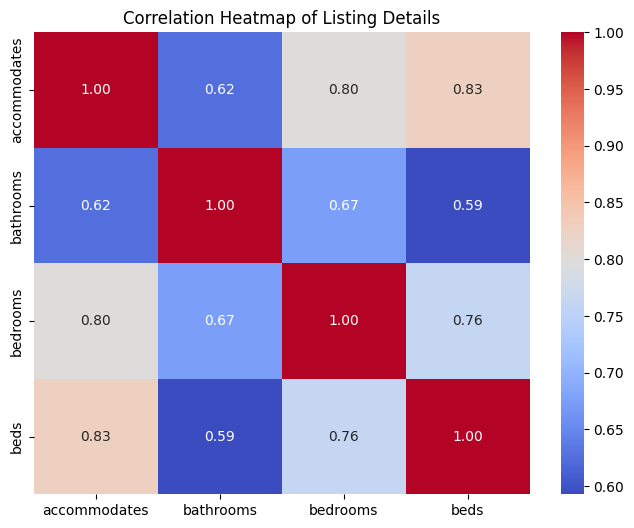

In [32]:
listing_details_vars = [
    'accommodates',
    'bathrooms',
    'bedrooms',
    'beds'
]

plt.figure(figsize=(8, 6))
sns.heatmap(df[listing_details_vars].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Listing Details')
plt.show()

## Heatmap for Host Details to Identify Correlation

Text(0.5, 1.0, 'Correlation Heatmap of Host Information')

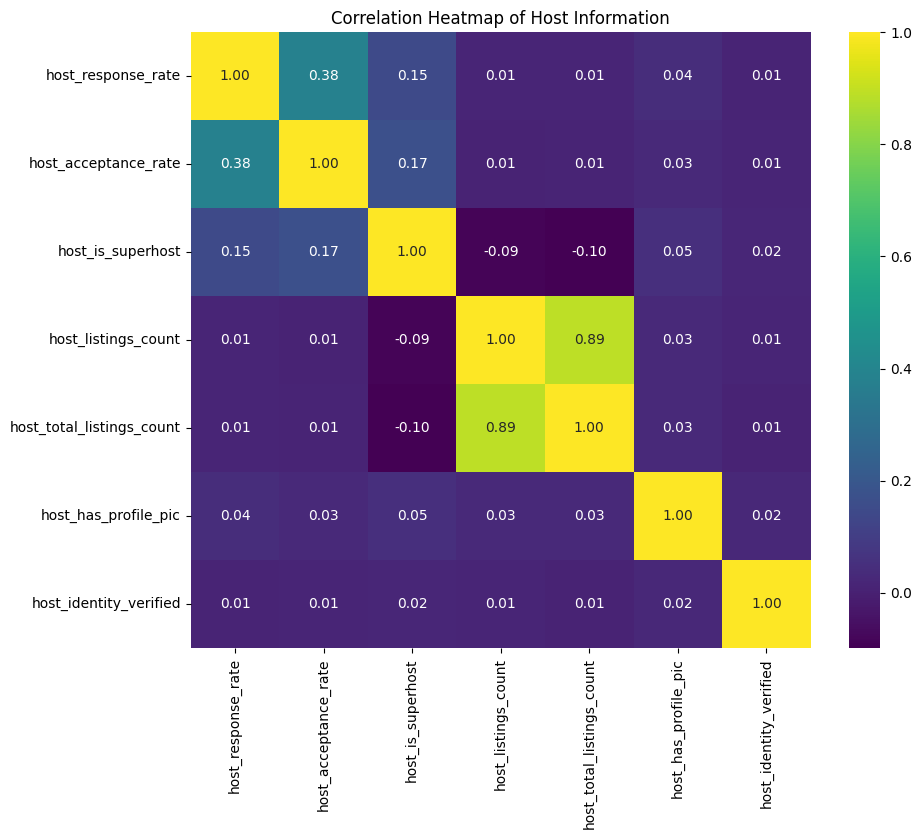

In [33]:
host_info_vars = [
    'host_response_rate',
    'host_acceptance_rate',
    'host_is_superhost',
    'host_listings_count',
    'host_total_listings_count',
    'host_has_profile_pic',
    'host_identity_verified'
]

plt.figure(figsize=(10, 8))
sns.heatmap(df[host_info_vars].corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap of Host Information')

In [34]:
# Here some Variable need to be dropped to multi-correlation
host_info_remove = [
    'host_listings_count',
]
df.drop(columns=host_info_remove, inplace=True)

## Heatmap for location to Identify Correlation

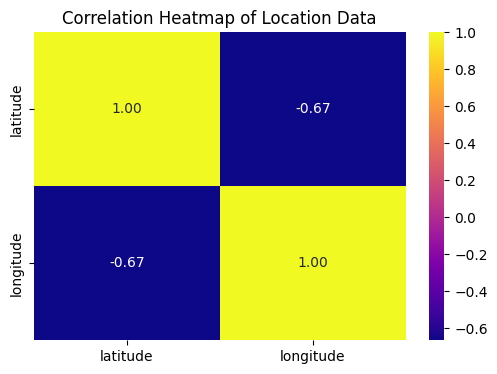

In [35]:
location_data_vars = [
    'latitude',
    'longitude'
]

plt.figure(figsize=(6, 4))
sns.heatmap(df[location_data_vars].corr(), annot=True, cmap='plasma', fmt=".2f")
plt.title('Correlation Heatmap of Location Data')
plt.show()

## Heatmap for pricing to Identify Correlation

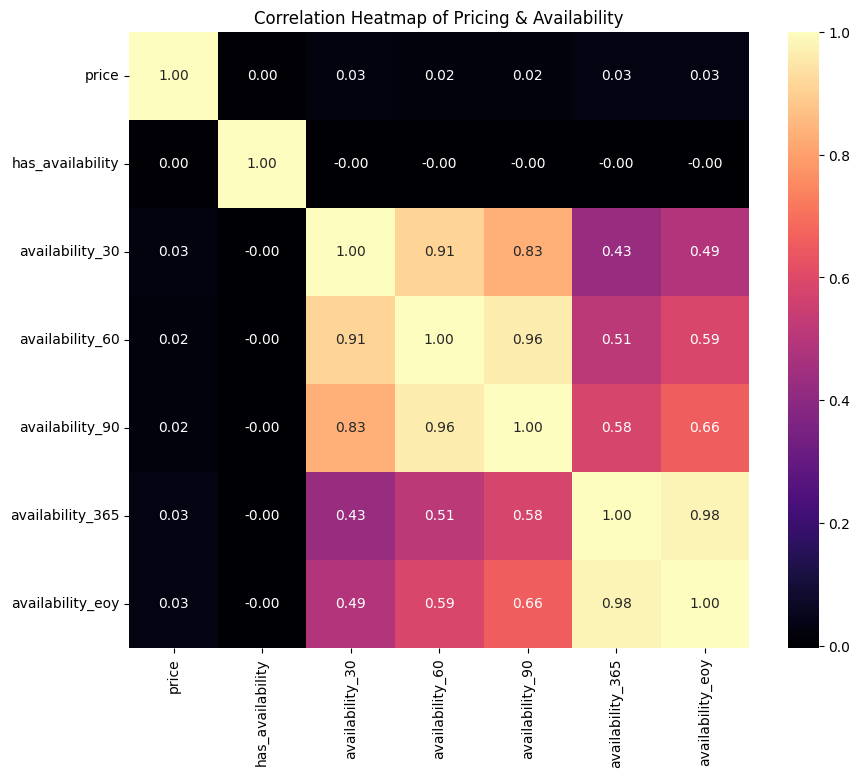

In [36]:
pricing_availability_vars = [
    'price',
    'has_availability',
    'availability_30',
    'availability_60',
    'availability_90',
    'availability_365',
    'availability_eoy'
]

plt.figure(figsize=(10, 8))
sns.heatmap(df[pricing_availability_vars].corr(), annot=True, cmap='magma', fmt=".2f")
plt.title('Correlation Heatmap of Pricing & Availability')
plt.show()

In [37]:
# Here some Variable need to be dropped to multi-correlation
pricing_availability_remove = [
    'availability_60',
    'availability_90',
    'availability_eoy'
]

df.drop(columns=pricing_availability_remove, inplace=True)

## Heatmap for Reviews to Identify Correlation

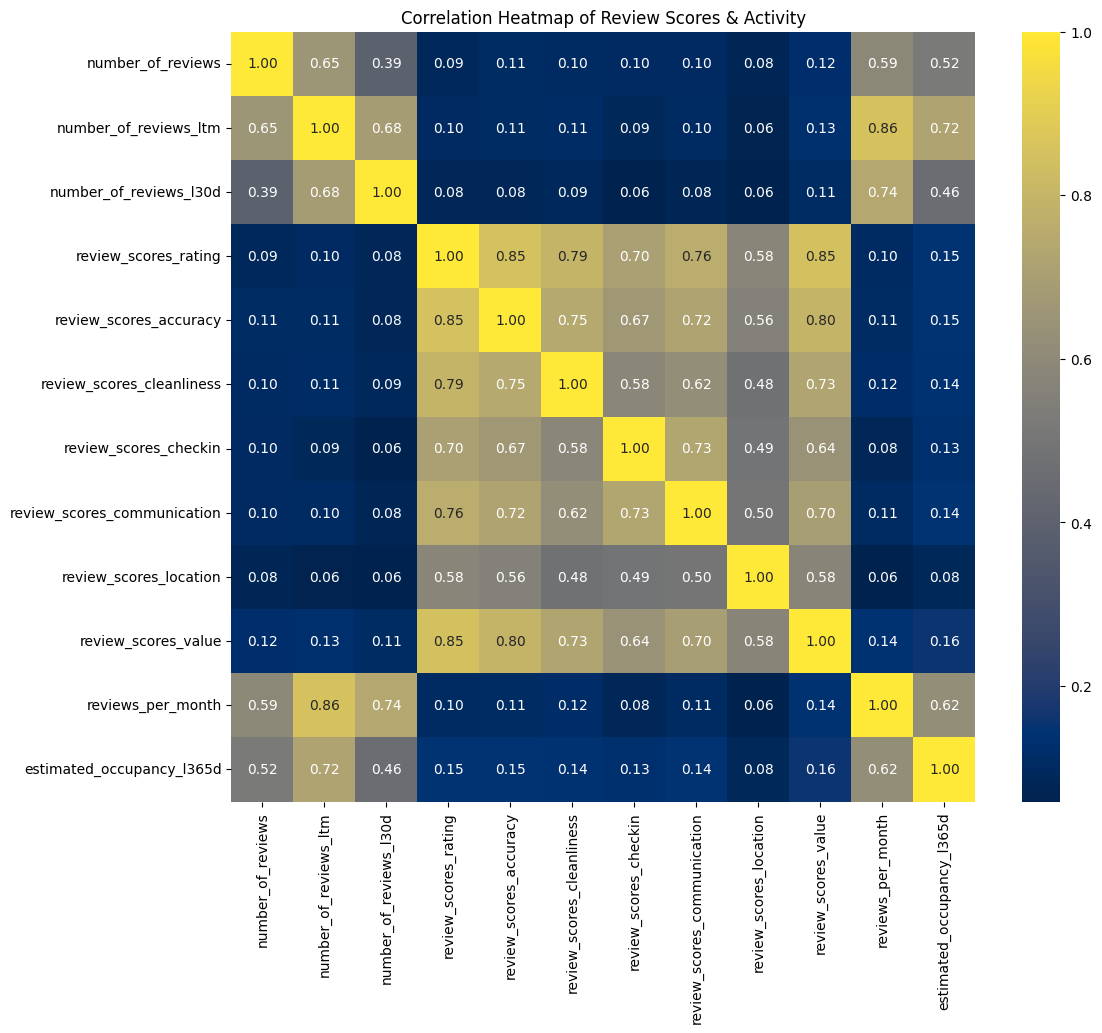

In [38]:
review_activity_vars = [
    'number_of_reviews',
    'number_of_reviews_ltm',
    'number_of_reviews_l30d',
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value',
    'reviews_per_month',
    'estimated_occupancy_l365d',
]

plt.figure(figsize=(12, 10))
sns.heatmap(df[review_activity_vars].corr(), annot=True, cmap='cividis', fmt=".2f")
plt.title('Correlation Heatmap of Review Scores & Activity')
plt.show()

In [39]:
# Here some Variable need to be dropped to multi-correlation
review_activity_remove = [
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_value',
]

df.drop(columns=review_activity_remove, inplace=True)

# Visualization 

## Price of Properties 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


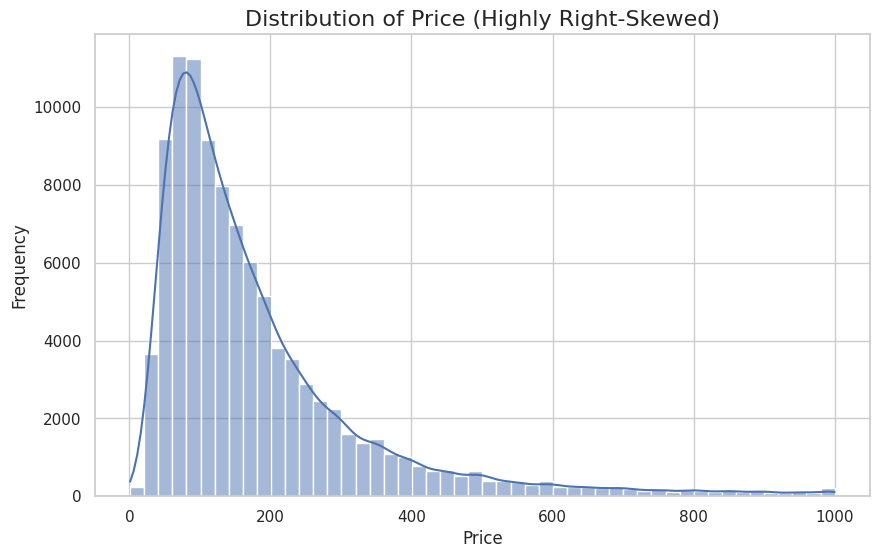

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
sns.set(style="whitegrid")

# Create a histogram to visualize the distribution of 'price'
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=50)
plt.title('Distribution of Price (Highly Right-Skewed)', fontsize=16)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

## Estimated Occupancy in last 365 Days 

Generating plot to visualize skewness...


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


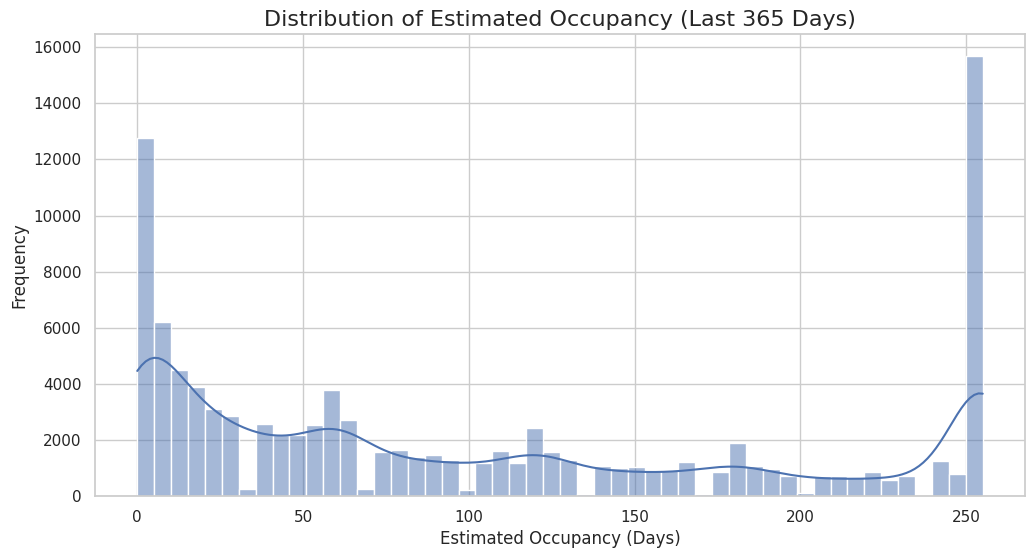

In [41]:
# b) Visualize the distribution
print("Generating plot to visualize skewness...")
plt.figure(figsize=(12, 6))
sns.histplot(df['estimated_occupancy_l365d'], kde=True, bins=50)
plt.title('Distribution of Estimated Occupancy (Last 365 Days)', fontsize=16)
plt.xlabel('Estimated Occupancy (Days)')
plt.ylabel('Frequency')
plt.show()

## Ratings for the Host

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


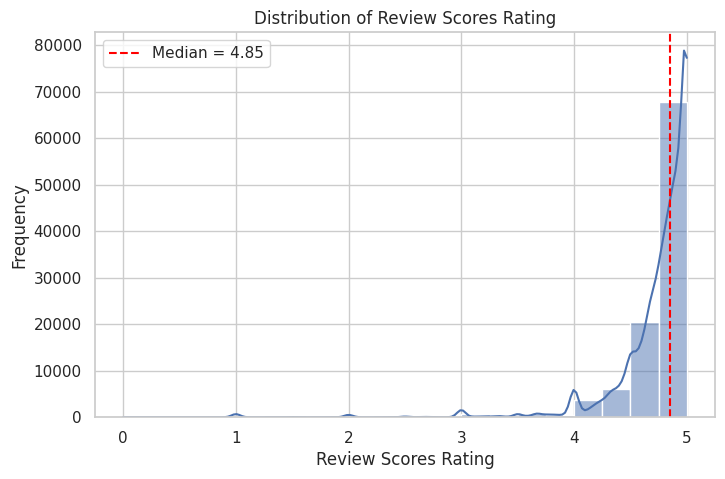

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate median
median_rating = df['review_scores_rating'].median()

# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['review_scores_rating'], bins=20, kde=True)

# Mark median line
plt.axvline(median_rating, color='red', linestyle='--', label=f'Median = {median_rating}')

# Labels and title
plt.xlabel('Review Scores Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Review Scores Rating')
plt.legend()
plt.show()


# Prediction for the Optimal price for Airbnb Property

## Box-Cox Transformation for price
To Remove the Skewness from both the Output we apply **Box-Cox Transformation**


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Transformed Price Distribution (Box-Cox)')

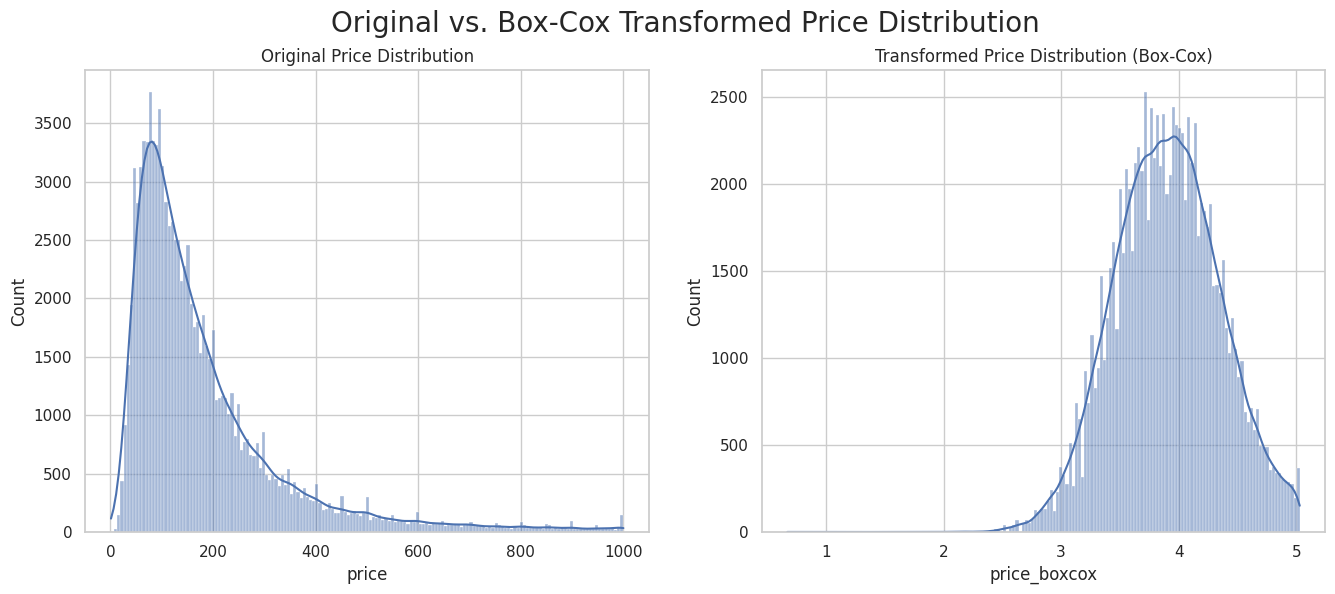

In [43]:
from scipy.stats import boxcox
price_positive = df['price'] + 1
transformed_price, best_lambda_price = boxcox(price_positive)
df['price_boxcox'] = transformed_price

# --- 4. Visualize the Transformed Price Distribution ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Original vs. Box-Cox Transformed Price Distribution', fontsize=20)

# Plot original price
sns.histplot(df['price'], kde=True, ax=axes[0])
axes[0].set_title('Original Price Distribution')

# Plot transformed price
sns.histplot(df['price_boxcox'], kde=True, ax=axes[1])
axes[1].set_title('Transformed Price Distribution (Box-Cox)')

## Decision Tree Regressor 

In [44]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor

# --- 2. Define Features (X) and Target (y) ---
# X includes all columns except the original price, the transformed price, and our new target.

y = df['price_boxcox']
X = df.drop(columns=['price', 'price_boxcox'])

# --- 3. Split and Scale the Data ---
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree_reg = DecisionTreeRegressor(random_state=42)

# Fit the model on the scaled training data
tree_reg.fit(X_train, y_train)

print("Decision Tree Regressor model has been successfully trained.")

# --- 4. Evaluate the Model ---
# Make predictions on the test set
y_pred = tree_reg.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Mean Squared Error (MSE) on Test Set: {mse:.4f}")
print(f"Model R-squared (R²) on Test Set: {r2:.4f}")


Decision Tree Regressor model has been successfully trained.

Model Mean Squared Error (MSE) on Test Set: 0.1147
Model R-squared (R²) on Test Set: 0.4382


## XGB Boost 

In [45]:
import xgboost as xgb
# --- 3. Train the XGBoost Regressor Model ---
# Initialize the model. `random_state` ensures reproducibility.
# `n_estimators` is the number of boosting rounds.
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Fit the model on the scaled training data
xgb_reg.fit(X_train, y_train)

print("XGBoost Regressor model has been successfully trained.")

# --- 4. Evaluate the Model ---
# Make predictions on the test set
y_pred = xgb_reg.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Mean Squared Error (MSE) on Test Set: {mse:.4f}")
print(f"Model R-squared (R²) on Test Set: {r2:.4f}")


XGBoost Regressor model has been successfully trained.

Model Mean Squared Error (MSE) on Test Set: 0.0511
Model R-squared (R²) on Test Set: 0.7499


## XGB Boost for Grid Search CV 
Here we further explore model parameters to identify optimal parameters for performance 

In [ ]:
from sklearn.model_selection import GridSearchCV

xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
# Define the grid of hyperparameters to search
# This is a small grid for demonstration; you can expand it.
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0]
}

# --- 5. Initialize and Run GridSearchCV ---
# cv=3 means 3-fold cross-validation.
# scoring='neg_mean_squared_error' is a standard metric for regression.
# n_jobs=-1 uses all available CPU cores to speed up the search.
grid_search = GridSearchCV(
    estimator=xgb_reg,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2 # Shows progress
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# --- 6. Display the Results ---
print("\n--- GridSearchCV Results ---")
print(f"Best Parameters found: {grid_search.best_params_}")
print(f"Best Score (Negative MSE): {grid_search.best_score_:.4f}")

# --- 7. Evaluate the Best Model on the Test Set ---
# The grid_search object automatically refits the best model on the entire training set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate final evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n--- Evaluation on Test Set ---")
print(f"Model Mean Squared Error (MSE): {mse:.4f}")
print(f"Model R-squared (R²): {r2:.4f}")

In [ ]:
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)


# 2️⃣ Plot feature importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(best_model, importance_type='weight', max_num_features=20)
plt.show()

## Reversing box-cox transformation

In [ ]:
from scipy.special import inv_boxcox

# Reverse transformation
price_pred = np.round(inv_boxcox(y_pred, best_lambda_price))

print(price_pred)

## Model for Streamlit app

In [ ]:
import pickle

with open("classifier.pkl", "wb") as model_file:
    pickle.dump(best_model,model_file)

# Prediction for Ratings for Airbnb Property

## Box-Cox Transformation for Ratings

In [1]:
from scipy import stats
import numpy as np

# Select the column
ratings = df['review_scores_rating']

# Remove NaN
ratings = ratings.dropna()

# Box-Cox only works with positive values
if (ratings <= 0).any():
    ratings = ratings + 1  # shift if needed

# Apply Box-Cox
transformed_ratings, lambda_value = stats.boxcox(ratings)

print(f"Lambda for Box-Cox Transformation: {lambda_value}")

# Optional: Add back to DataFrame
df['review_scores_rating_boxcox'] = np.nan
df.loc[ratings.index, 'review_scores_rating_boxcox'] = transformed_ratings


NameError: name 'df' is not defined

In [ ]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Select the column
ratings = df['review_scores_rating']

# Step 2: Drop NaN values
ratings_no_na = ratings.dropna()

# Step 3: Ensure positive values (Box-Cox requirement)
if (ratings_no_na <= 0).any():
    ratings_no_na = ratings_no_na + 1

# Step 4: Apply Box–Cox transformation
transformed_ratings, lambda_value = stats.boxcox(ratings_no_na)

# Step 5: Store back into DataFrame
df['review_scores_rating_boxcox'] = np.nan
df.loc[ratings_no_na.index, 'review_scores_rating_boxcox'] = transformed_ratings

print(f"Lambda for Box–Cox Transformation: {lambda_value}")

# Step 6: Plot Before & After
plt.figure(figsize=(12, 5))

# Before
plt.subplot(1, 2, 1)
sns.histplot(ratings_no_na, bins=20, kde=True)
plt.title('Before Box–Cox')
plt.xlabel('Review Scores Rating')

# After
plt.subplot(1, 2, 2)
sns.histplot(transformed_ratings, bins=20, kde=True, color='orange')
plt.title('After Box–Cox')
plt.xlabel('Transformed Review Scores Rating')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from scipy.special import inv_boxcox
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor

# =================================
# 1. Prepare Data
# =================================
# 'review_scores_rating_boxcox' is already transformed
X = df.drop(columns=['review_scores_rating', 'review_scores_rating_boxcox'])
y = df['review_scores_rating_boxcox']


# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# =================================
# 2. Grid Search with XGBRegressor
# =================================
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0]
}

xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

# =================================
# 3. Predictions & Inverse Box-Cox
# =================================
y_pred = grid_search.predict(X_test)

# =================================
# 4. Evaluation
# =================================
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


In [ ]:
best_model_ratings = grid_search.best_estimator_

In [ ]:
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_model_ratings.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(best_model_ratings, importance_type='weight', max_num_features=20)
plt.show()

## Reversing box-cox transformation

In [ ]:
from scipy.special import inv_boxcox

# Reverse transformation
ratings_pred = np.round(inv_boxcox(y_pred, best_lambda_price))

print(price_pred)

## Model for Streamlit app

In [ ]:
import pickle

with open("classifier.pkl", "wb") as model_file:
    pickle.dump(best_model,model_file)